# CHICAGO VECHICLE CRASHES

<img src="image.jpg" width="400">


# PROJECT SUMMARY

# 1. DATA UNDERSTANDING

# 2. BUSINESS PROBLEM

# 3. OBJECTIVES

## 3.1 Main objective
1. Build a model that can predict the likelihood of accidents based on features.

## 3.2 Specific objectives
1. To determine how various factors e.g Weather conditions contribute  to road accidents.
2. To analyze the relationship and patterns between time of day, day of the week and month of the year with Road accidents.
3. To determine the most dangerous Locations.
4. To establish the relationship between speed limit and fatality of injury.
5. To identify conditions that most contribute to fatal outcomes such as crash type and the condition of traffic control devices.

## 3.3 Metric of success

# 4. DATA UNDERSTANDING

## 4.1 Data Limitation

## 4.2 Loading a dataset

In [1]:
# Import the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')



In [2]:
df= pd.read_csv("traffic_crashes.zip", low_memory= False)
df.head()

,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,10/12/2025 02:15:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PEDALCYCLIST,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,...,0.0,0.0,2.0,0.0,2,1,10,41.864686,-87.628601,POINT (-87.628600775248 41.864686205128)
1,10/12/2025 01:30:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",FIXED OBJECT,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,...,0.0,0.0,1.0,0.0,1,1,10,41.778137,-87.751688,POINT (-87.751688421991 41.778136527292)
2,10/12/2025 01:15:00 AM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,...,0.0,0.0,2.0,0.0,1,1,10,41.900585,-87.632986,POINT (-87.632986070025 41.900584800211)
3,10/12/2025 01:15:00 AM,25,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",FIXED OBJECT,DIVIDED - W/MEDIAN BARRIER,STRAIGHT AND LEVEL,DRY,...,0.0,0.0,1.0,0.0,1,1,10,41.831062,-87.630739,POINT (-87.630739346453 41.831062009276)
4,10/12/2025 01:11:00 AM,35,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,...,0.0,0.0,2.0,0.0,1,1,10,41.774252,-87.644497,POINT (-87.644496549933 41.774252148861)


In [3]:
(df.isnull().sum()/len(df))*100

CRASH_DATE                       0.000000
POSTED_SPEED_LIMIT               0.000000
TRAFFIC_CONTROL_DEVICE           0.000000
DEVICE_CONDITION                 0.000000
WEATHER_CONDITION                0.000000
LIGHTING_CONDITION               0.000000
FIRST_CRASH_TYPE                 0.000000
TRAFFICWAY_TYPE                  0.000000
ALIGNMENT                        0.000000
ROADWAY_SURFACE_COND             0.000000
ROAD_DEFECT                      0.000000
REPORT_TYPE                      3.286638
CRASH_TYPE                       0.000000
DAMAGE                           0.000000
DATE_POLICE_NOTIFIED             0.000000
PRIM_CONTRIBUTORY_CAUSE          0.000000
SEC_CONTRIBUTORY_CAUSE           0.000000
STREET_NO                        0.000000
STREET_DIRECTION                 0.000403
STREET_NAME                      0.000101
BEAT_OF_OCCURRENCE               0.000504
NUM_UNITS                        0.000000
MOST_SEVERE_INJURY               0.218014
INJURIES_TOTAL                   0

In [4]:
columns_to_drop =[
    "INJURIES_FATAL","INJURIES_INCAPACITATING",
    "INJURIES_NON_INCAPACITATING","INJURIES_REPORTED_NOT_EVIDENT",
    "INJURIES_NO_INDICATION","INJURIES_UNKNOWN","REPORT_TYPE",
     "ROADWAY_SURFACE_COND","BEAT_OF_OCCURRENCE"]
df = df.drop(columns_to_drop,axis =1)

We also decided to drop missing values in our `REPORT_TYPE`,`STREET_DIRECTION`,`STREET_NAME`columns.

In [6]:
df = df.dropna(subset =["MOST_SEVERE_INJURY","INJURIES_TOTAL","STREET_DIRECTION","STREET_NAME","LATITUDE","LONGITUDE","LOCATION"])

In [7]:
df.isnull().sum()

CRASH_DATE                 0
POSTED_SPEED_LIMIT         0
TRAFFIC_CONTROL_DEVICE     0
DEVICE_CONDITION           0
WEATHER_CONDITION          0
LIGHTING_CONDITION         0
FIRST_CRASH_TYPE           0
TRAFFICWAY_TYPE            0
ALIGNMENT                  0
ROAD_DEFECT                0
CRASH_TYPE                 0
DAMAGE                     0
DATE_POLICE_NOTIFIED       0
PRIM_CONTRIBUTORY_CAUSE    0
SEC_CONTRIBUTORY_CAUSE     0
STREET_NO                  0
STREET_DIRECTION           0
STREET_NAME                0
NUM_UNITS                  0
MOST_SEVERE_INJURY         0
INJURIES_TOTAL             0
CRASH_HOUR                 0
CRASH_DAY_OF_WEEK          0
CRASH_MONTH                0
LATITUDE                   0
LONGITUDE                  0
LOCATION                   0
dtype: int64

In [8]:
df.shape

(982961, 27)

Let's change the name of all the columns to lowercase for usability.

In [9]:
df.columns = df.columns.str.lower()

From below you can tell our `DAMAGE` column has "$" "," and is an object but it should be a integer so let's get rid of any whitesapaces and other inputs and convert it to int datatype

In [8]:
df["DAMAGE"].value_counts()

DAMAGE
OVER $1,500      634123
$501 - $1,500    249178
$500 OR LESS     109294
Name: count, dtype: int64

In [13]:
# check the datatype of the other columns
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 982961 entries, 0 to 992594
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   crash_date               982961 non-null  datetime64[ns]
 1   posted_speed_limit       982961 non-null  int64         
 2   traffic_control_device   982961 non-null  object        
 3   device_condition         982961 non-null  object        
 4   weather_condition        982961 non-null  object        
 5   lighting_condition       982961 non-null  object        
 6   first_crash_type         982961 non-null  object        
 7   trafficway_type          982961 non-null  object        
 8   alignment                982961 non-null  object        
 9   road_defect              982961 non-null  object        
 10  crash_type               982961 non-null  object        
 11  damage                   982961 non-null  object        
 12  date_police_notified 

Let's change the datatype of `crash_date` to datetime.

In [11]:
df['crash_date'] = pd.to_datetime(df['crash_date'])

Since `crash_hour`,`crash_day_of_week` and `crash_month` have the same information as `crash_date` it is advisable to drop them.

In [12]:
columns =["crash_hour","crash_day_of_week","crash_month"]
df = df.drop(columns,axis =1)

Let's get rid of all whitespaces in every column.

In [14]:
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].str.strip()

In [15]:
df.head(7)

,crash_date,posted_speed_limit,traffic_control_device,device_condition,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,road_defect,...,sec_contributory_cause,street_no,street_direction,street_name,num_units,most_severe_injury,injuries_total,latitude,longitude,location
0,2025-10-12 02:15:00,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PEDALCYCLIST,NOT DIVIDED,STRAIGHT AND LEVEL,NO DEFECTS,...,NOT APPLICABLE,1336,S,PLYMOUTH CT,2,NO INDICATION OF INJURY,0.0,41.864686,-87.628601,POINT (-87.628600775248 41.864686205128)
1,2025-10-12 01:30:00,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",FIXED OBJECT,NOT DIVIDED,STRAIGHT AND LEVEL,NO DEFECTS,...,UNABLE TO DETERMINE,5153,W,63RD ST,1,NO INDICATION OF INJURY,0.0,41.778137,-87.751688,POINT (-87.751688421991 41.778136527292)
2,2025-10-12 01:15:00,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,NOT DIVIDED,STRAIGHT AND LEVEL,UNKNOWN,...,DISTRACTION - FROM INSIDE VEHICLE,1000,N,LA SALLE DR,2,NO INDICATION OF INJURY,0.0,41.900585,-87.632986,POINT (-87.632986070025 41.900584800211)
3,2025-10-12 01:15:00,25,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",FIXED OBJECT,DIVIDED - W/MEDIAN BARRIER,STRAIGHT AND LEVEL,NO DEFECTS,...,NOT APPLICABLE,142,W,35TH ST,1,NO INDICATION OF INJURY,0.0,41.831062,-87.630739,POINT (-87.630739346453 41.831062009276)
4,2025-10-12 01:11:00,35,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,NO DEFECTS,...,IMPROPER TURNING/NO SIGNAL,6601,S,HALSTED ST,2,NO INDICATION OF INJURY,0.0,41.774252,-87.644497,POINT (-87.644496549933 41.774252148861)
5,2025-10-12 00:56:00,30,NO CONTROLS,NO CONTROLS,CLEAR,DARKNESS,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,NO DEFECTS,...,NOT APPLICABLE,1809,W,NORTH AVE,3,NO INDICATION OF INJURY,0.0,41.910445,-87.672973,POINT (-87.672972542585 41.910445412955)
6,2025-10-12 00:25:00,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,NO DEFECTS,...,NOT APPLICABLE,5500,S,PULASKI RD,2,NO INDICATION OF INJURY,0.0,41.793155,-87.723304,POINT (-87.723303764642 41.793155060731)


In [16]:
df.describe()

,crash_date,posted_speed_limit,street_no,num_units,injuries_total,latitude,longitude
count,982961,982961.000000,982961.000000,982961.000000,982961.000000,982961.000000,982961.000000
mean,2021-03-18 16:11:49.265372928,28.443802,3692.362053,2.036498,0.197757,41.855239,-87.673245
min,2013-03-03 16:48:00,0.000000,1.000000,1.000000,0.000000,0.000000,-87.939678
25%,2018-12-01 22:45:00,30.000000,1300.000000,2.000000,0.000000,41.784067,-87.721817
50%,2021-04-21 04:56:00,30.000000,3202.000000,2.000000,0.000000,41.875174,-87.674364
75%,2023-07-20 14:55:00,30.000000,5556.000000,2.000000,0.000000,41.924769,-87.633797
max,2025-10-12 02:15:00,99.000000,13799.000000,18.000000,21.000000,42.022780,0.000000
std,NaN,6.010941,2829.566788,0.448432,0.577275,0.351103,0.715405


# 5. EXPLANATORY DATA ANALYSIS

## 5.1 UNIVARIATE ANALYIS

Let's look at the `most_severe_injury` column to understand the fatality of most injuries.

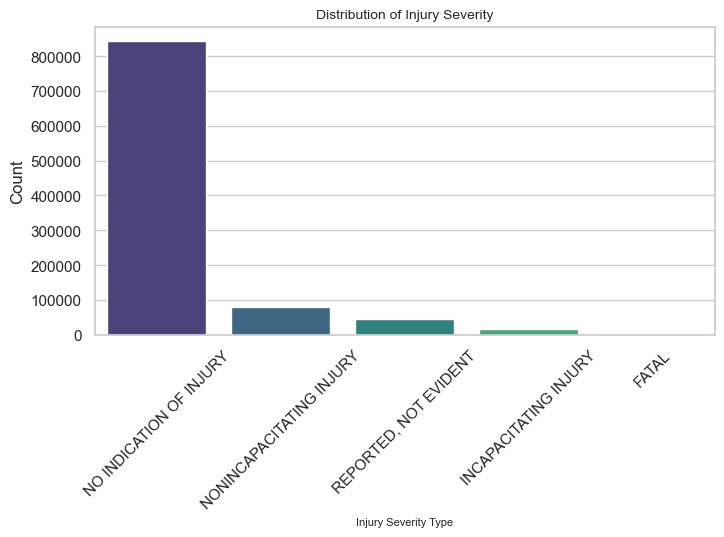

In [24]:
# Set style
sns.set(style="whitegrid")

# Plot
plt.figure(figsize=(10,4))
sns.countplot(data=df, x='most_severe_injury', palette='viridis')

# Add labels
plt.title("Distribution of Injury Severity", fontsize=10)
plt.xlabel("Injury Severity Type", fontsize=8)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)  
plt.show()

In [27]:
df.columns

Index(['crash_date', 'posted_speed_limit', 'traffic_control_device',
       'device_condition', 'weather_condition', 'lighting_condition',
       'first_crash_type', 'trafficway_type', 'alignment', 'road_defect',
       'crash_type', 'damage', 'date_police_notified',
       'prim_contributory_cause', 'sec_contributory_cause', 'street_no',
       'street_direction', 'street_name', 'num_units', 'most_severe_injury',
       'injuries_total', 'latitude', 'longitude', 'location'],
      dtype='object')

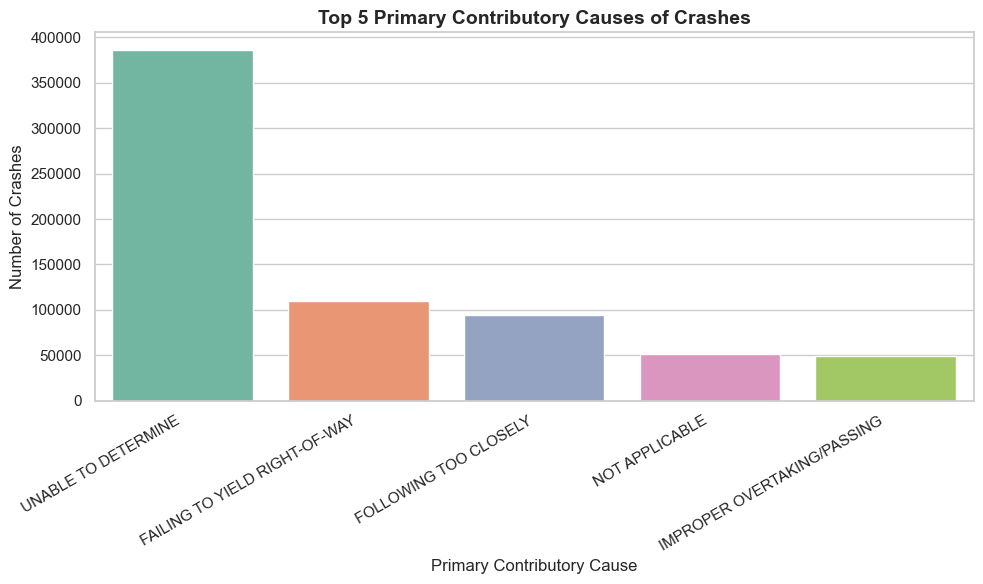

In [28]:
# Get top 5 contributory causes
top_5 = df['prim_contributory_cause'].value_counts().nlargest(5).index

# Filter dataset to include only top 5
df_top5 = df[df['prim_contributory_cause'].isin(top_5)]

# Create vertical countplot
plt.figure(figsize=(10,6))
sns.countplot(
    x='prim_contributory_cause',
    data=df_top5,
    order=top_5,
    palette='Set2'   
)

plt.title('Top 5 Primary Contributory Causes of Crashes', fontsize=14, weight='bold')
plt.xlabel('Primary Contributory Cause', fontsize=12)
plt.ylabel('Number of Crashes', fontsize=12)
plt.xticks(rotation=30, ha='right')  
plt.tight_layout()
plt.show()

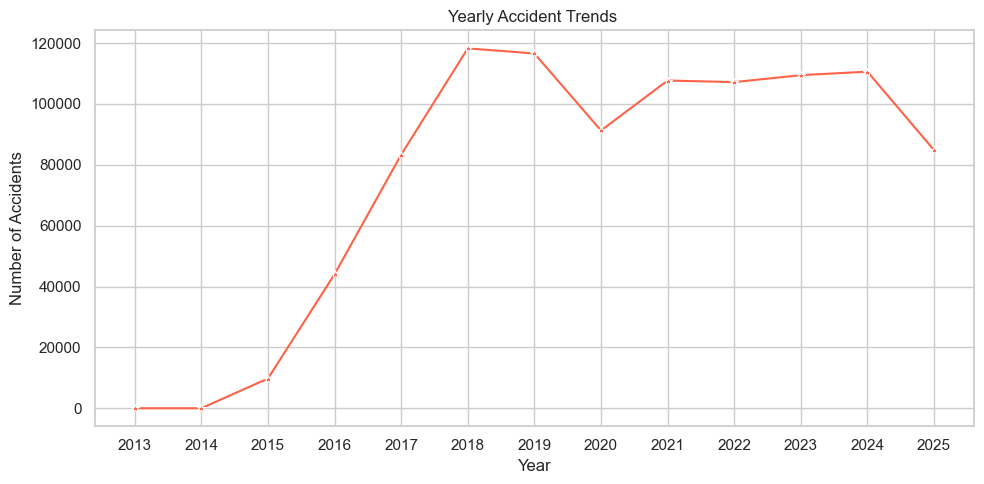

In [31]:
# Extract the year
df['year'] = df['crash_date'].dt.year

# Count number of accidents per year
yearly_counts = df.groupby('year').size().reset_index(name='count')
sns.set_theme(style='whitegrid')

# Plot
plt.figure(figsize=(10, 5))
sns.lineplot(data=yearly_counts, x='year', y='count', marker='*', color='tomato')

# Customize
plt.title('Yearly Accident Trends ')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.xticks(yearly_counts['year'])  
plt.tight_layout()
plt.show()